<a href="https://colab.research.google.com/github/Esheshwari/python-programming/blob/main/Amazon_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('Amazon Sale Report.csv.zip')
data['ship-city'].fillna(data['ship-city'].mode()[0], inplace=True)
data['ship-state'].fillna(data['ship-state'].mode()[0], inplace=True)
data['ship-country'].fillna(data['ship-country'].mode()[0], inplace=True)
data['ship-postal-code'].fillna(data['ship-postal-code'].mode()[0], inplace=True)
data['Amount'].fillna(data['Amount'].mean(), inplace=True)
data['currency'].fillna('USD', inplace=True)
data['promotion-ids'].fillna(data['promotion-ids'].mode()[0], inplace=True)
data['fulfilled-by'].fillna(data['fulfilled-by'].mode()[0], inplace=True)
data['Unnamed: 22'].fillna(data['Unnamed: 22'].mode()[0], inplace=True)
data['Courier Status'].fillna(data['Courier Status'].mode()[0], inplace=True)
print(data.isnull().sum())
print(data.dtypes)
print(data.columns)
duplicates = data.duplicated()
print(data.head())

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3032738106.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('Amazon Sale Report.csv.zip')
C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3032738106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ship-city'].fillna(data['ship-city'].mode()[0], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_10748\3032738106.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Serie

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                  

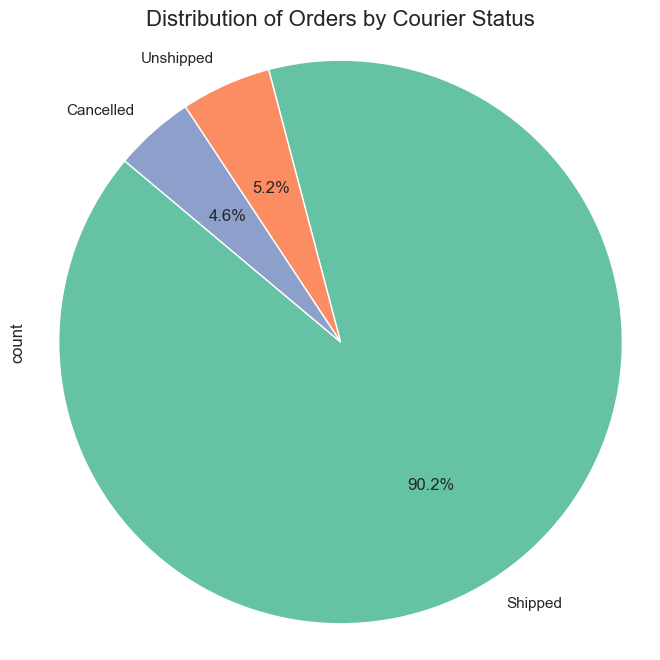

In [ ]:
#pie chart to visualize the no. of orders that got accepted, rejected and cancelled
import matplotlib.pyplot as plt
import seaborn as sns
# Create a pie chart
plt.figure(figsize=(8, 8))
data['Courier Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))

# Set the title
plt.title('Distribution of Orders by Courier Status', fontsize=16)
# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

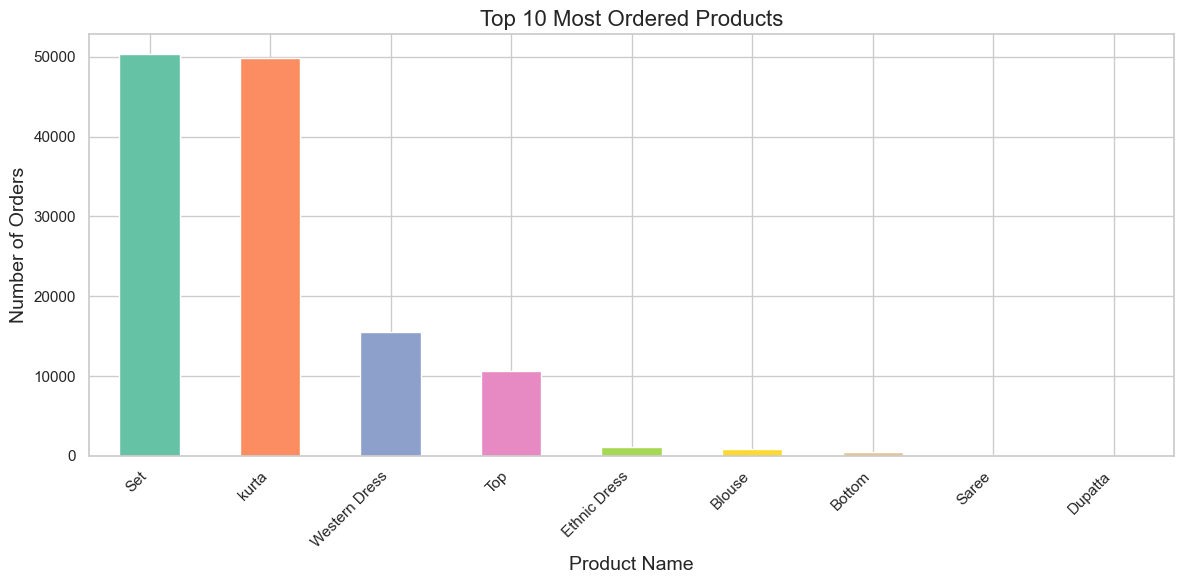

In [ ]:
#Bar chart to visualize which is the most ordered item
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar chart
plt.figure(figsize=(12, 6))
data['Category'].value_counts().head(10).plot.bar(color=sns.color_palette('Set2'))
# Set the title and labels
plt.title('Top 10 Most Ordered Products', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

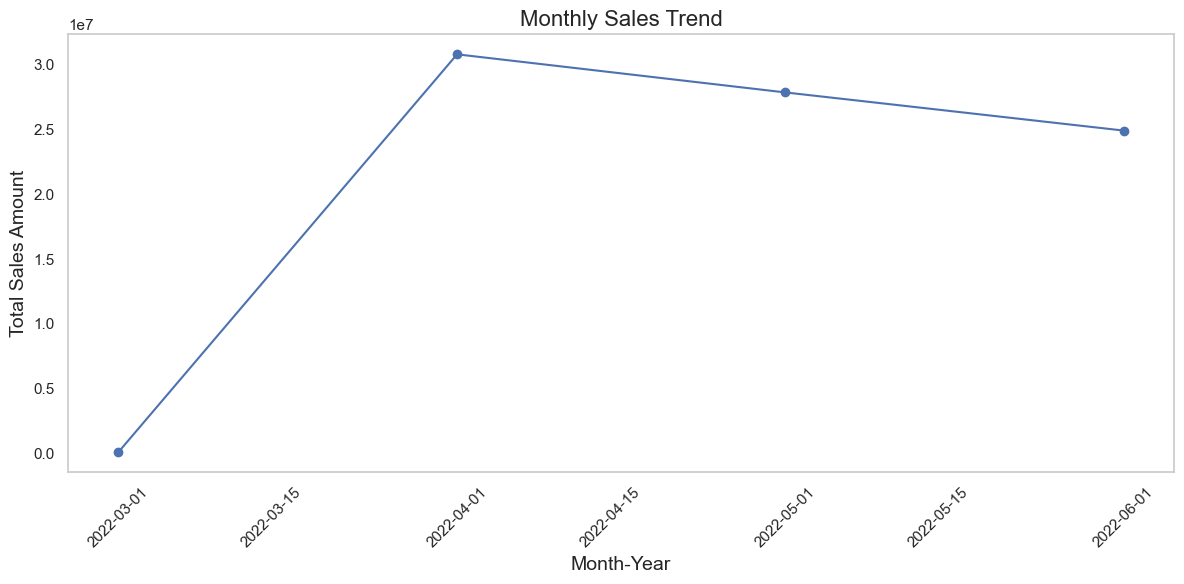

In [ ]:
#I want to visualize the sales trend over the months
import matplotlib.pyplot as plt
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'])
data['month_year'] = data['Date'].dt.to_period('M')
monthly_sales = data.groupby('month_year')['Amount'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'], monthly_sales['Amount'], marker='o', color='b')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\69157183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='ship-state', y='Amount', data=data_top_states, palette='Set2')


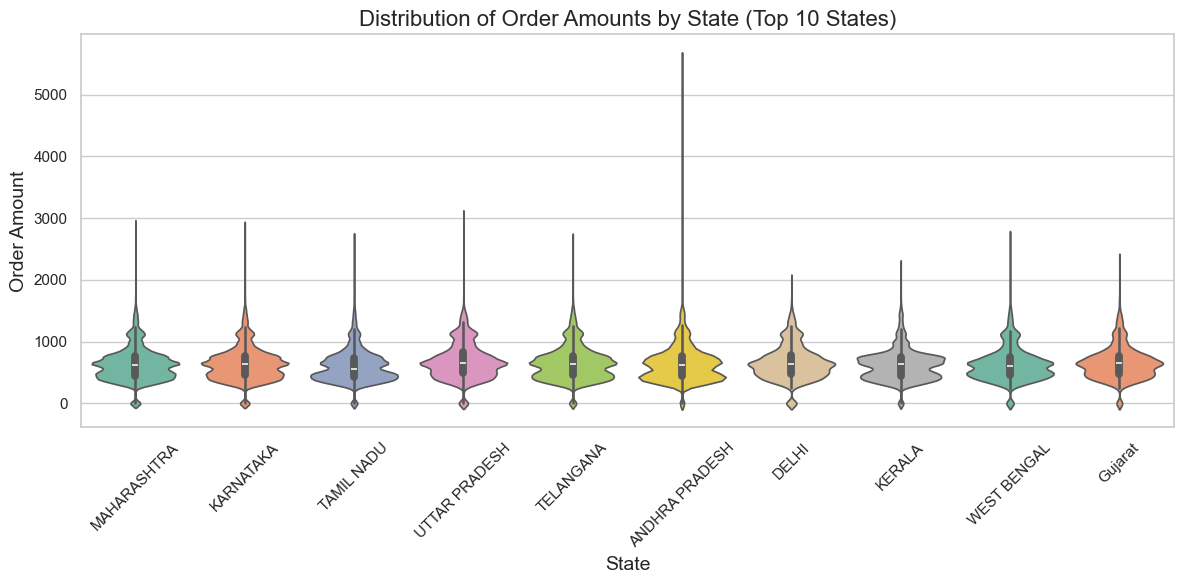

In [ ]:
#visualize which region ordered most items using violin plot only for top 10 states
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
top_states = data['ship-state'].value_counts().head(10).index
data_top_states = data[data['ship-state'].isin(top_states)]
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='ship-state', y='Amount', data=data_top_states, palette='Set2')
plt.title('Distribution of Order Amounts by State (Top 10 States)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Order Amount', fontsize=14)
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10748\2377524825.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ship-service-level', y='Amount', data=data, palette='Set2')


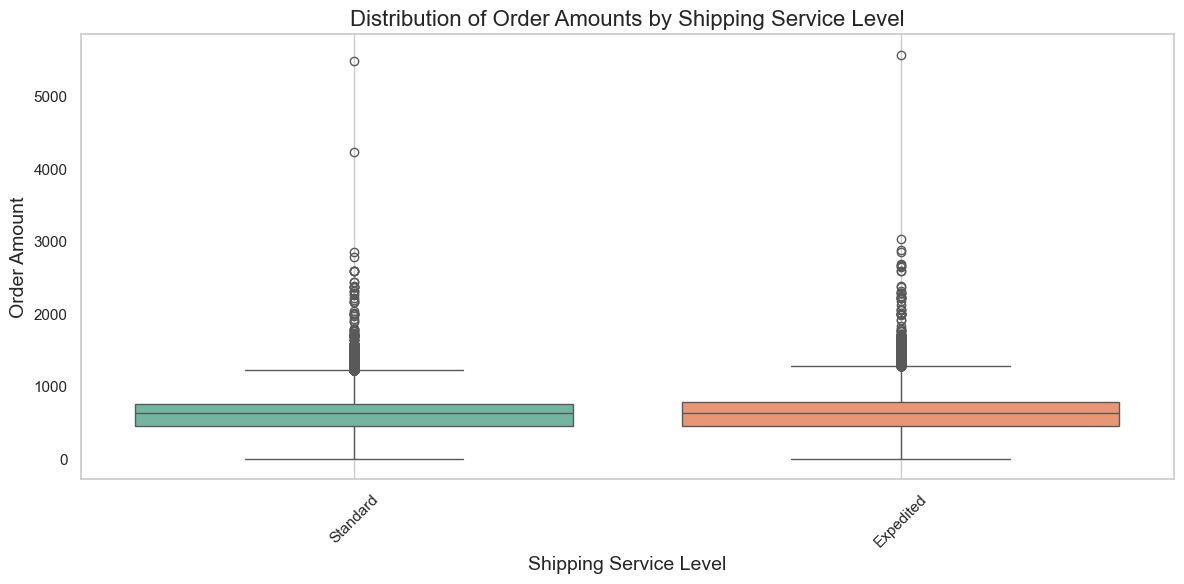

In [ ]:
#Visualization on the basis of ship-service-level using box plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ship-service-level', y='Amount', data=data, palette='Set2')
plt.title('Distribution of Order Amounts by Shipping Service Level', fontsize=16)
plt.xlabel('Shipping Service Level', fontsize=14)
plt.ylabel('Order Amount', fontsize=14)
# Show the plot
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()